In [1]:
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

In [2]:
from google.colab import drive
drive.mount('/content/drive')
import os
os.chdir('./drive/My Drive/ERA5_Dataset')

Mounted at /content/drive


In [3]:
import sys
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pandas.api.types import CategoricalDtype
from sklearn.preprocessing import MinMaxScaler

from sklearn.ensemble import GradientBoostingClassifier
from datetime import datetime

import pickle
import metrics
import datashift

# Evaluate variable distribution over 4 geogrphical zones

## KDE for Wind Gust

In [4]:
def mean_n_zones(zones_n):
  new_att_list = []
  for i in range(zones_n):
    new_att_list.append('Mean_Z{}-0'.format(i+1))
  return new_att_list

In [5]:
df_wind = pd.read_csv('./csv/9_zones/wind_gust_10D.csv')
atts = ['DATE'] + mean_n_zones(9)
df_wind = df_wind[atts]
df_wind

,DATE,Mean_Z1-0,Mean_Z2-0,Mean_Z3-0,Mean_Z4-0,Mean_Z5-0,Mean_Z6-0,Mean_Z7-0,Mean_Z8-0,Mean_Z9-0
0,1980-01-12,6.506417,9.392741,8.236001,6.607272,7.013070,8.202967,8.473271,12.305270,11.595043
1,1980-01-13,6.536364,7.481540,7.290668,5.330942,7.233211,8.913707,7.015750,11.765725,11.327724
2,1980-01-14,5.639493,6.835888,8.067545,5.105187,7.514850,9.727436,7.305304,10.042318,11.490627
3,1980-01-15,6.072405,7.686377,8.795392,6.107588,7.966433,8.722249,8.664117,9.407010,10.166441
4,1980-01-16,5.629685,6.828614,8.894757,5.616150,8.050129,7.631980,10.308571,10.773307,9.472188
...,...,...,...,...,...,...,...,...,...,...
15411,2022-03-23,5.248798,5.880452,8.566128,4.922488,8.606219,12.742471,7.850206,8.287708,11.550832
15412,2022-03-24,5.518447,7.537591,8.657307,3.969126,8.472084,12.033450,6.281567,8.698712,10.062395
15413,2022-03-25,4.552826,8.025350,9.145470,3.280564,7.828526,12.204824,6.339914,8.712874,11.108244
15414,2022-03-26,4.329504,7.328543,7.488530,3.668311,8.049461,11.987306,5.562140,8.131139,12.622691


In [6]:
wind_zones = []
zones_flag = []
N_samples = len(df_wind)

for att in mean_n_zones(9):
  wind_zones.append(df_wind[att].values)

for i in range(9):
  zones_flag.append(np.full(N_samples, i+1))

wind_arr = np.concatenate(wind_zones)
flag_arr = np.concatenate(zones_flag)
# Create a DataFrame using the arrays
data = {'Wind': wind_arr, 'Zone': flag_arr}
df_kde = pd.DataFrame(data)

df_kde

,Wind,Zone
0,6.506417,1
1,6.536364,1
2,5.639493,1
3,6.072405,1
4,5.629685,1
...,...,...
138739,11.550832,9
138740,10.062395,9
138741,11.108244,9
138742,12.622691,9


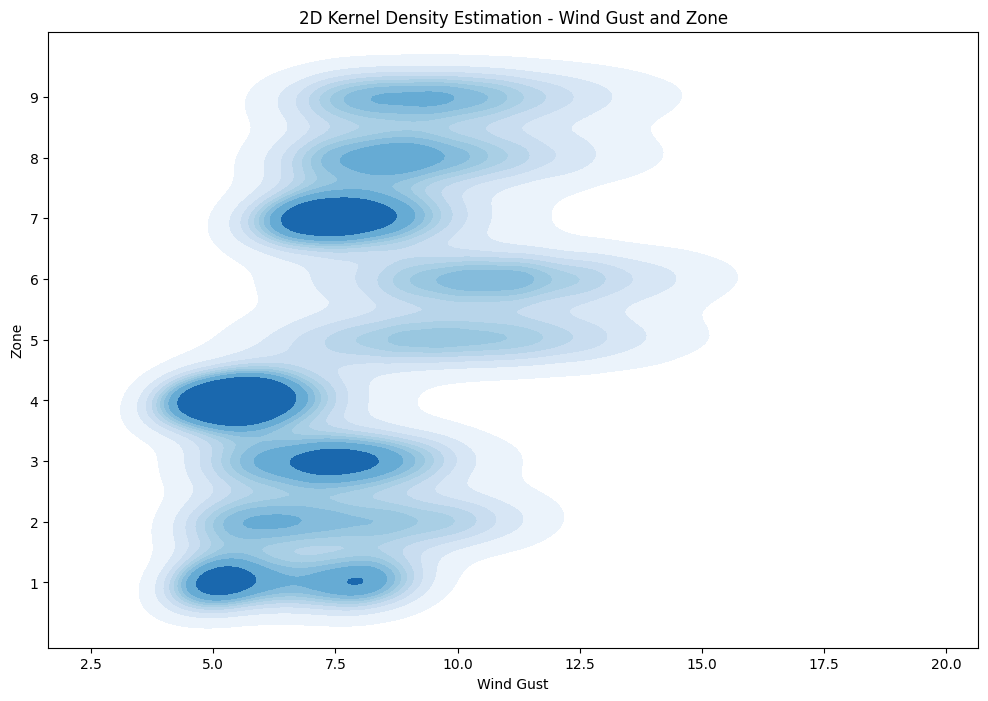

In [7]:
# Create a 2D KDE plot
plt.figure(figsize=(12, 8))
sns.kdeplot(x='Wind', y='Zone', data=df_kde, cmap="Blues", fill=True)

# Set custom y-axis tick values
custom_y_ticks = [
                     1,  2,  3,  4,  5,  6,  7,  8,  9
                  ]

plt.yticks(custom_y_ticks)

plt.title('2D Kernel Density Estimation - Wind Gust and Zone')
plt.xlabel('Wind Gust')
plt.ylabel('Zone')

plt.show()

## KDE for pressure

In [8]:
def mean_n_zones(zones_n):
  new_att_list = []
  for i in range(zones_n):
    new_att_list.append('Mean_Z{}-0'.format(i+1))
  return new_att_list

In [9]:
df_press = pd.read_csv('./csv/9_zones/pressure_10D.csv')
atts = ['DATE'] + mean_n_zones(9)
df_press = df_press[atts]
df_press

,DATE,Mean_Z1-0,Mean_Z2-0,Mean_Z3-0,Mean_Z4-0,Mean_Z5-0,Mean_Z6-0,Mean_Z7-0,Mean_Z8-0,Mean_Z9-0
0,1980-01-12,100973.905715,100882.857833,100930.227946,100838.147422,100629.248152,100922.742226,100917.965008,100891.460819,101556.512758
1,1980-01-13,101014.917441,100950.653059,100907.615673,100981.894701,100772.913363,100933.090268,100989.986993,101054.737674,101694.722072
2,1980-01-14,101118.680795,101064.827113,100929.577537,101123.539971,100846.505577,101009.493377,101369.988725,101148.606553,101787.065290
3,1980-01-15,101168.224817,101079.718696,101032.867944,101215.592542,100891.169396,101114.772703,101526.112569,101212.209098,101860.364423
4,1980-01-16,101209.893276,101086.288666,101017.207030,101197.165114,100872.409850,101101.707662,101489.793916,101096.546776,101743.791152
...,...,...,...,...,...,...,...,...,...,...
15411,2022-03-23,101209.855438,100868.807869,100794.496719,101401.055567,101041.344693,100857.849653,101688.786302,101608.080549,101726.743392
15412,2022-03-24,101196.242261,100859.790526,100719.997449,101338.281107,100928.589794,100653.853597,101357.298182,101454.666008,101457.723987
15413,2022-03-25,101077.286746,100762.300548,100747.308275,101102.506498,100803.523188,100621.840238,100955.585199,101266.963086,101422.002720
15414,2022-03-26,100982.311897,100802.628679,100950.749478,100980.155979,100814.873137,100785.909845,101138.747944,101212.570980,101526.802649


In [10]:
press_zones = []
zones_flag = []
N_samples = len(df_press)

for att in mean_n_zones(9):
  press_zones.append(df_press[att].values)

for i in range(9):
  zones_flag.append(np.full(N_samples, i+1))

press_arr = np.concatenate(press_zones)
flag_arr = np.concatenate(zones_flag)
# Create a DataFrame using the arrays
data = {'Pressure': press_arr, 'Zone': flag_arr}
df_kde = pd.DataFrame(data)

df_kde

,Pressure,Zone
0,100973.905715,1
1,101014.917441,1
2,101118.680795,1
3,101168.224817,1
4,101209.893276,1
...,...,...
138739,101726.743392,9
138740,101457.723987,9
138741,101422.002720,9
138742,101526.802649,9


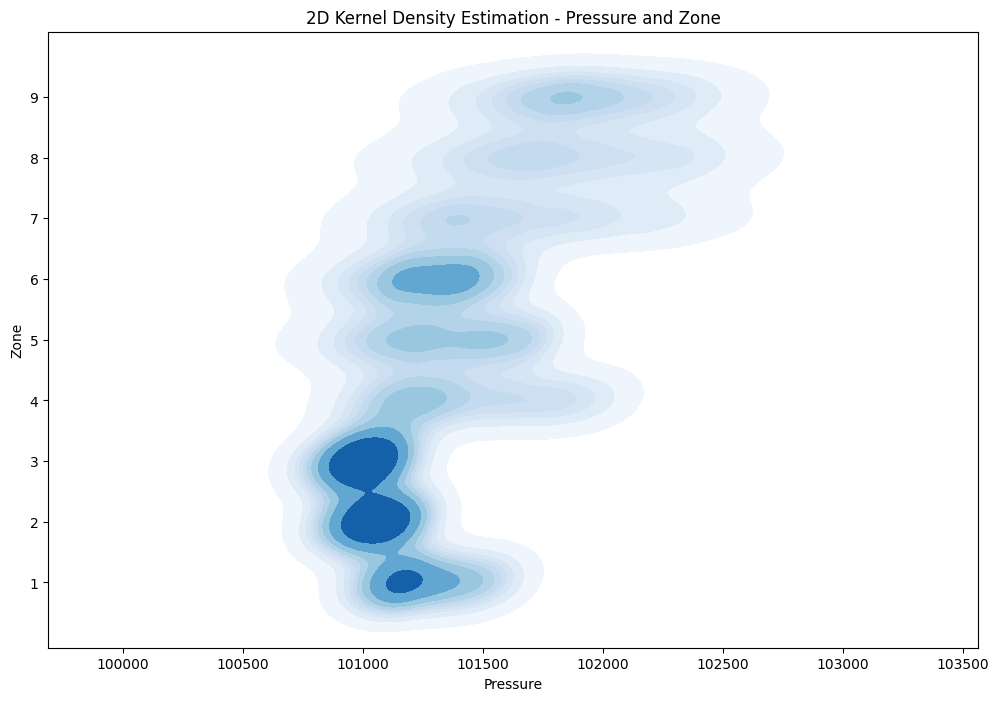

In [11]:
# Create a 2D KDE plot
plt.figure(figsize=(12, 8))
sns.kdeplot(x='Pressure', y='Zone', data=df_kde, cmap="Blues", fill=True)

# Set custom y-axis tick values
custom_y_ticks = [
                     1,  2,  3,  4,  5,  6,  7,  8,  9
                  ]
plt.yticks(custom_y_ticks)

plt.title('2D Kernel Density Estimation - Pressure and Zone')
plt.xlabel('Pressure')
plt.ylabel('Zone')

plt.show()

## KDE for Sea Surface Temperature

In [12]:
def mean_n_zones(zones_n):
  new_att_list = []
  for i in range(zones_n):
    new_att_list.append('Mean_Z{}-0'.format(i+1))
  return new_att_list

In [13]:
df_temp = pd.read_csv('./csv/9_zones/temperature_1000hPa_10D.csv')
atts = ['DATE'] + mean_n_zones(9)
df_temp = df_temp[atts]
df_temp

,DATE,Mean_Z1-0,Mean_Z2-0,Mean_Z3-0,Mean_Z4-0,Mean_Z5-0,Mean_Z6-0,Mean_Z7-0,Mean_Z8-0,Mean_Z9-0
0,1980-01-12,299.773591,298.722502,298.571564,298.447674,298.774057,298.187829,296.645302,297.440229,294.603530
1,1980-01-13,299.706064,298.662798,298.553637,298.407339,298.649274,298.097004,297.031830,297.539275,294.180270
2,1980-01-14,299.755632,298.534910,298.296469,298.624006,298.428787,298.140194,296.588462,297.190122,294.127693
3,1980-01-15,299.607422,298.496344,298.195065,298.373426,298.589300,298.088090,296.167675,297.093282,294.423642
4,1980-01-16,299.440174,298.573911,298.412068,298.369954,298.490269,298.342494,296.432893,296.782968,295.445859
...,...,...,...,...,...,...,...,...,...,...
15411,2022-03-23,299.632906,300.052526,300.169323,298.255094,299.633932,299.050799,296.434374,297.070003,295.687465
15412,2022-03-24,300.521974,299.828110,300.213145,298.924508,299.713178,299.129335,297.429623,296.951303,295.543790
15413,2022-03-25,300.904594,300.260696,300.125938,299.949493,299.528837,299.172417,298.471867,297.243471,295.364412
15414,2022-03-26,301.147704,300.216905,299.980926,300.471623,299.783290,299.230254,297.377070,297.321514,295.712757


In [14]:
sst_zones = []
zones_flag = []
N_samples = len(df_temp)

for att in mean_n_zones(9):
  sst_zones.append(df_temp[att].values - 273.15)

for i in range(9):
  zones_flag.append(np.full(N_samples, i+1))

sst_arr = np.concatenate(sst_zones)
flag_arr = np.concatenate(zones_flag)
# Create a DataFrame using the arrays
data = {'SST': sst_arr, 'Zone': flag_arr}
df_kde = pd.DataFrame(data)

df_kde

,SST,Zone
0,26.623591,1
1,26.556064,1
2,26.605632,1
3,26.457422,1
4,26.290174,1
...,...,...
138739,22.537465,9
138740,22.393790,9
138741,22.214412,9
138742,22.562757,9


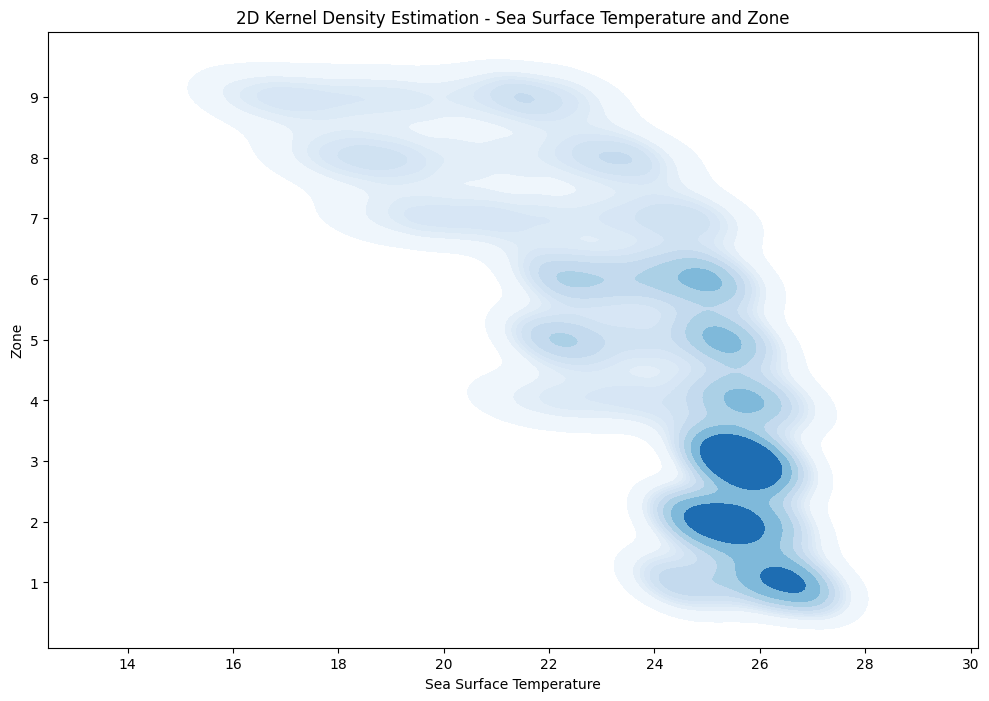

In [15]:
# Create a 2D KDE plot
plt.figure(figsize=(12, 8))
sns.kdeplot(x='SST', y='Zone', data=df_kde, cmap="Blues", fill=True)

# Set custom y-axis tick values
custom_y_ticks = [
                     1,  2,  3,  4,  5,  6,  7,  8,  9
                  ]
plt.yticks(custom_y_ticks)

plt.title('2D Kernel Density Estimation - Sea Surface Temperature and Zone')
plt.xlabel('Sea Surface Temperature')
plt.ylabel('Zone')

plt.show()

# Evaluate variables distribution over weeks of the year

## Wind Gust

In [ ]:
df_wind = pd.read_csv('./csv/36_zones/wind_gust_10D.csv')
atts = ['DATE'] + mean_n_zones(36)
df_wind = df_wind[atts]
df_wind = df_wind.set_index('DATE')
df_wind

,Mean_Z1-0,Mean_Z2-0,Mean_Z3-0,Mean_Z4-0,Mean_Z5-0,Mean_Z6-0,Mean_Z7-0,Mean_Z8-0,Mean_Z9-0,Mean_Z10-0,...,Mean_Z27-0,Mean_Z28-0,Mean_Z29-0,Mean_Z30-0,Mean_Z31-0,Mean_Z32-0,Mean_Z33-0,Mean_Z34-0,Mean_Z35-0,Mean_Z36-0
DATE,,,,,,,,,,,,,,,,,,,,,
1980-01-12,3.548740,9.412391,9.483792,7.913419,6.782344,9.266021,3.426698,9.637839,9.303541,10.870209,...,10.319242,12.085269,12.070151,10.582200,6.543351,11.859654,13.649060,13.034233,12.449431,11.319591
1980-01-13,4.107833,9.294527,7.848129,5.781929,4.519856,8.635076,3.017467,9.725628,8.242869,8.053233,...,9.820364,11.625386,12.460661,10.363258,6.561680,9.107341,11.680472,13.833991,11.546332,11.174237
1980-01-14,3.763220,8.419221,6.536001,5.486318,6.757631,8.711023,3.032400,7.343130,7.320442,8.000793,...,7.009375,12.273957,12.944783,11.432724,5.946938,8.507656,8.352167,12.579706,11.366022,10.611045
1980-01-15,3.793521,8.966829,7.559456,6.974781,7.776763,9.034895,3.397312,8.131960,8.348882,7.862389,...,7.282163,11.987348,11.364119,11.001195,6.870468,9.536734,7.560960,10.855529,9.868039,8.887527
1980-01-16,4.022417,7.428180,5.745913,5.860072,7.151002,8.291923,3.811386,7.256756,8.317372,7.391098,...,9.683074,10.548295,9.625702,10.422405,8.867028,13.942839,12.870493,9.784280,10.091712,8.000431
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-03-23,5.014873,4.613250,4.480374,7.290698,9.784600,5.896713,3.673720,7.693350,6.851555,4.899182,...,8.243713,8.804151,11.101488,13.430420,8.040659,11.713286,9.020756,7.220425,9.801560,12.082103
2022-03-24,4.135883,6.420239,6.445776,11.559761,10.422340,5.069840,3.482660,8.035005,5.540690,6.604139,...,8.442447,8.831783,11.411475,11.964918,6.761475,11.063924,9.765960,7.846725,7.896013,9.319567
2022-03-25,3.264814,5.741061,6.031738,11.951245,11.516801,4.054412,2.805589,6.399840,5.339819,8.778596,...,7.304366,10.109534,13.486906,11.323813,7.345169,8.772989,7.585347,9.872298,10.573877,9.548143


In [ ]:
dates = df_wind.index

def get_week_number(date_str):
    # Convert the date string to a datetime object
    date_object = datetime.strptime(date_str, '%Y-%m-%d')
    # Use strftime to get the ISO week number
    week_number = date_object.strftime('%V')
    return int(week_number)

week_number_list = []
for elem in dates:
  week_number_list.append(get_week_number(elem))

week_number_arr = np.array(week_number_list)
print(week_number_arr.shape)
print(week_number_arr)

(15416,)
[ 2  2  3 ... 12 12 12]


In [ ]:
df_wind['WEEK'] = week_number_arr
df_wind

,Mean_Z1-0,Mean_Z2-0,Mean_Z3-0,Mean_Z4-0,Mean_Z5-0,Mean_Z6-0,Mean_Z7-0,Mean_Z8-0,Mean_Z9-0,Mean_Z10-0,...,Mean_Z28-0,Mean_Z29-0,Mean_Z30-0,Mean_Z31-0,Mean_Z32-0,Mean_Z33-0,Mean_Z34-0,Mean_Z35-0,Mean_Z36-0,WEEK
DATE,,,,,,,,,,,,,,,,,,,,,
1980-01-12,3.548740,9.412391,9.483792,7.913419,6.782344,9.266021,3.426698,9.637839,9.303541,10.870209,...,12.085269,12.070151,10.582200,6.543351,11.859654,13.649060,13.034233,12.449431,11.319591,2
1980-01-13,4.107833,9.294527,7.848129,5.781929,4.519856,8.635076,3.017467,9.725628,8.242869,8.053233,...,11.625386,12.460661,10.363258,6.561680,9.107341,11.680472,13.833991,11.546332,11.174237,2
1980-01-14,3.763220,8.419221,6.536001,5.486318,6.757631,8.711023,3.032400,7.343130,7.320442,8.000793,...,12.273957,12.944783,11.432724,5.946938,8.507656,8.352167,12.579706,11.366022,10.611045,3
1980-01-15,3.793521,8.966829,7.559456,6.974781,7.776763,9.034895,3.397312,8.131960,8.348882,7.862389,...,11.987348,11.364119,11.001195,6.870468,9.536734,7.560960,10.855529,9.868039,8.887527,3
1980-01-16,4.022417,7.428180,5.745913,5.860072,7.151002,8.291923,3.811386,7.256756,8.317372,7.391098,...,10.548295,9.625702,10.422405,8.867028,13.942839,12.870493,9.784280,10.091712,8.000431,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-03-23,5.014873,4.613250,4.480374,7.290698,9.784600,5.896713,3.673720,7.693350,6.851555,4.899182,...,8.804151,11.101488,13.430420,8.040659,11.713286,9.020756,7.220425,9.801560,12.082103,12
2022-03-24,4.135883,6.420239,6.445776,11.559761,10.422340,5.069840,3.482660,8.035005,5.540690,6.604139,...,8.831783,11.411475,11.964918,6.761475,11.063924,9.765960,7.846725,7.896013,9.319567,12
2022-03-25,3.264814,5.741061,6.031738,11.951245,11.516801,4.054412,2.805589,6.399840,5.339819,8.778596,...,10.109534,13.486906,11.323813,7.345169,8.772989,7.585347,9.872298,10.573877,9.548143,12


In [ ]:
wind_zones_arr = []
zones_flag = []

for i in range(36):
  wind_zones_arr.append(df_wind['Mean_Z{}-0'.format(i+1)].values)

for i in range(36):
  zones_flag.append(df_wind['WEEK'].values)

wind_arr = np.concatenate(wind_zones_arr)
flag_arr = np.concatenate(zones_flag)
# Create a DataFrame using the arrays
data = {'Wind': wind_arr, 'Week': flag_arr}
df_kde = pd.DataFrame(data)

df_kde

,Wind,Week
0,3.548740,2
1,4.107833,2
2,3.763220,3
3,3.793521,3
4,4.022417,3
...,...,...
554971,12.082103,12
554972,9.319567,12
554973,9.548143,12
554974,11.314538,12


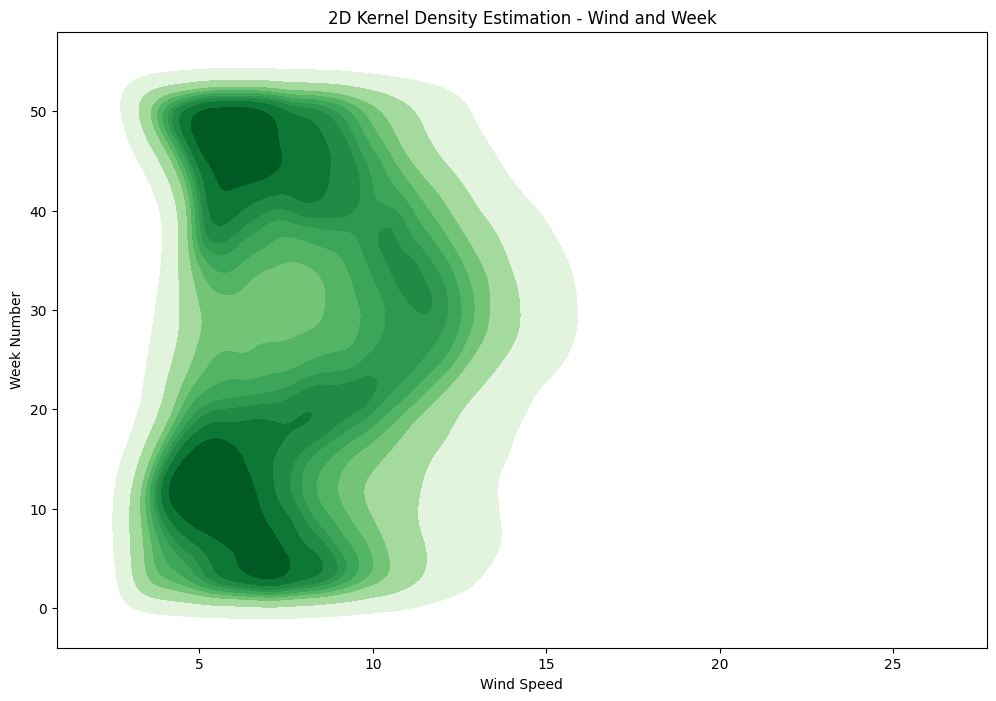

In [ ]:
# Create a 2D KDE plot
plt.figure(figsize=(12, 8))
sns.kdeplot(x='Wind', y='Week', data=df_kde, cmap="Greens", fill=True)

plt.title('2D Kernel Density Estimation - Wind and Week')
plt.xlabel('Wind Speed')
plt.ylabel('Week Number')

plt.show()

## Pressure

In [ ]:
df_press = pd.read_csv('./csv/36_zones/pressure_10D.csv')
atts = ['DATE'] + mean_n_zones(36)
df_press = df_press[atts]
df_press = df_press.set_index('DATE')
df_press

,Mean_Z1-0,Mean_Z2-0,Mean_Z3-0,Mean_Z4-0,Mean_Z5-0,Mean_Z6-0,Mean_Z7-0,Mean_Z8-0,Mean_Z9-0,Mean_Z10-0,...,Mean_Z27-0,Mean_Z28-0,Mean_Z29-0,Mean_Z30-0,Mean_Z31-0,Mean_Z32-0,Mean_Z33-0,Mean_Z34-0,Mean_Z35-0,Mean_Z36-0
DATE,,,,,,,,,,,,,,,,,,,,,
1980-01-12,101060.785148,100915.567676,100932.441176,100947.737961,100959.190681,100912.172487,101058.472410,100860.797625,100825.817375,100825.434821,...,100521.367435,100946.354098,101293.820514,101329.863022,101264.145444,100664.009661,100679.584700,101387.222399,101775.328269,101781.285921
1980-01-13,101086.364575,100930.370383,100991.437476,100961.799828,100951.872878,100918.823183,101133.882775,100909.052033,100930.272568,100919.102364,...,100730.655001,101083.437157,101412.383147,101473.445608,101147.175273,100878.238008,100853.500756,101521.919359,101927.195880,101923.615435
1980-01-14,101189.221933,101087.974636,101162.290692,101068.392321,100998.579841,100909.595389,101152.663672,101044.862938,101047.216432,100981.409005,...,100846.795040,101136.136971,101525.213028,101587.100621,101637.709078,101367.608775,101079.104942,101501.553040,101959.632563,102036.869553
1980-01-15,101245.205412,101101.986484,101094.173677,101096.165180,101052.757999,101048.102698,101256.704076,101069.003296,101046.571741,101081.964186,...,100887.912269,101218.077244,101558.211593,101724.311507,101791.733997,101502.242378,101204.311416,101511.149308,101939.694371,102178.484719
1980-01-16,101285.648124,101153.051227,101140.514944,101090.406308,101049.230167,101000.908140,101271.528087,101129.345667,101063.865217,101050.368195,...,100842.351671,101088.752156,101438.330492,101677.229771,101643.822160,101645.186201,101256.605705,101172.883083,101733.900735,102085.501328
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-03-23,101357.413204,101009.152594,100920.948997,100833.041809,100782.281441,100879.865298,101412.474107,101060.381845,100901.961539,100819.279130,...,101473.475620,101405.165938,101418.371551,101556.333651,101871.754090,101721.021173,101818.348820,101700.933294,101825.378920,102053.549090
2022-03-24,101327.218861,101007.408223,100955.550212,100828.149194,100732.232643,100828.048230,101387.461194,101062.880765,100891.653147,100763.809552,...,101331.736888,101246.604467,101194.021179,101277.274176,101292.978895,101421.818057,101639.468456,101566.804514,101616.294765,101701.516295
2022-03-25,101256.227041,100887.224413,100805.673734,100803.125721,100755.368170,100878.877698,101236.556359,100929.139171,100758.162759,100682.239976,...,101151.110114,101136.169206,101130.799927,101244.929936,100947.012498,100922.740053,101279.216031,101479.873996,101617.282551,101651.523814


In [ ]:
dates = df_press.index

def get_week_number(date_str):
    # Convert the date string to a datetime object
    date_object = datetime.strptime(date_str, '%Y-%m-%d')
    # Use strftime to get the ISO week number
    week_number = date_object.strftime('%V')
    return int(week_number)

week_number_list = []
for elem in dates:
  week_number_list.append(get_week_number(elem))

week_number_arr = np.array(week_number_list)
print(week_number_arr.shape)
print(week_number_arr)

(15416,)
[ 2  2  3 ... 12 12 12]


In [ ]:
df_press['WEEK'] = week_number_arr
df_press

,Mean_Z1-0,Mean_Z2-0,Mean_Z3-0,Mean_Z4-0,Mean_Z5-0,Mean_Z6-0,Mean_Z7-0,Mean_Z8-0,Mean_Z9-0,Mean_Z10-0,...,Mean_Z28-0,Mean_Z29-0,Mean_Z30-0,Mean_Z31-0,Mean_Z32-0,Mean_Z33-0,Mean_Z34-0,Mean_Z35-0,Mean_Z36-0,WEEK
DATE,,,,,,,,,,,,,,,,,,,,,
1980-01-12,101060.785148,100915.567676,100932.441176,100947.737961,100959.190681,100912.172487,101058.472410,100860.797625,100825.817375,100825.434821,...,100946.354098,101293.820514,101329.863022,101264.145444,100664.009661,100679.584700,101387.222399,101775.328269,101781.285921,2
1980-01-13,101086.364575,100930.370383,100991.437476,100961.799828,100951.872878,100918.823183,101133.882775,100909.052033,100930.272568,100919.102364,...,101083.437157,101412.383147,101473.445608,101147.175273,100878.238008,100853.500756,101521.919359,101927.195880,101923.615435,2
1980-01-14,101189.221933,101087.974636,101162.290692,101068.392321,100998.579841,100909.595389,101152.663672,101044.862938,101047.216432,100981.409005,...,101136.136971,101525.213028,101587.100621,101637.709078,101367.608775,101079.104942,101501.553040,101959.632563,102036.869553,3
1980-01-15,101245.205412,101101.986484,101094.173677,101096.165180,101052.757999,101048.102698,101256.704076,101069.003296,101046.571741,101081.964186,...,101218.077244,101558.211593,101724.311507,101791.733997,101502.242378,101204.311416,101511.149308,101939.694371,102178.484719,3
1980-01-16,101285.648124,101153.051227,101140.514944,101090.406308,101049.230167,101000.908140,101271.528087,101129.345667,101063.865217,101050.368195,...,101088.752156,101438.330492,101677.229771,101643.822160,101645.186201,101256.605705,101172.883083,101733.900735,102085.501328,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-03-23,101357.413204,101009.152594,100920.948997,100833.041809,100782.281441,100879.865298,101412.474107,101060.381845,100901.961539,100819.279130,...,101405.165938,101418.371551,101556.333651,101871.754090,101721.021173,101818.348820,101700.933294,101825.378920,102053.549090,12
2022-03-24,101327.218861,101007.408223,100955.550212,100828.149194,100732.232643,100828.048230,101387.461194,101062.880765,100891.653147,100763.809552,...,101246.604467,101194.021179,101277.274176,101292.978895,101421.818057,101639.468456,101566.804514,101616.294765,101701.516295,12
2022-03-25,101256.227041,100887.224413,100805.673734,100803.125721,100755.368170,100878.877698,101236.556359,100929.139171,100758.162759,100682.239976,...,101136.169206,101130.799927,101244.929936,100947.012498,100922.740053,101279.216031,101479.873996,101617.282551,101651.523814,12


In [ ]:
press_zones_arr = []
zones_flag = []

for i in range(36):
  press_zones_arr.append(df_press['Mean_Z{}-0'.format(i+1)].values)

for i in range(36):
  zones_flag.append(df_wind['WEEK'].values)

press_arr = np.concatenate(press_zones_arr)
flag_arr = np.concatenate(zones_flag)
# Create a DataFrame using the arrays
data = {'Pressure': press_arr, 'Week': flag_arr}
df_kde = pd.DataFrame(data)

df_kde

,Pressure,Week
0,101060.785148,2
1,101086.364575,2
2,101189.221933,3
3,101245.205412,3
4,101285.648124,3
...,...,...
554971,102053.549090,12
554972,101701.516295,12
554973,101651.523814,12
554974,101883.916341,12


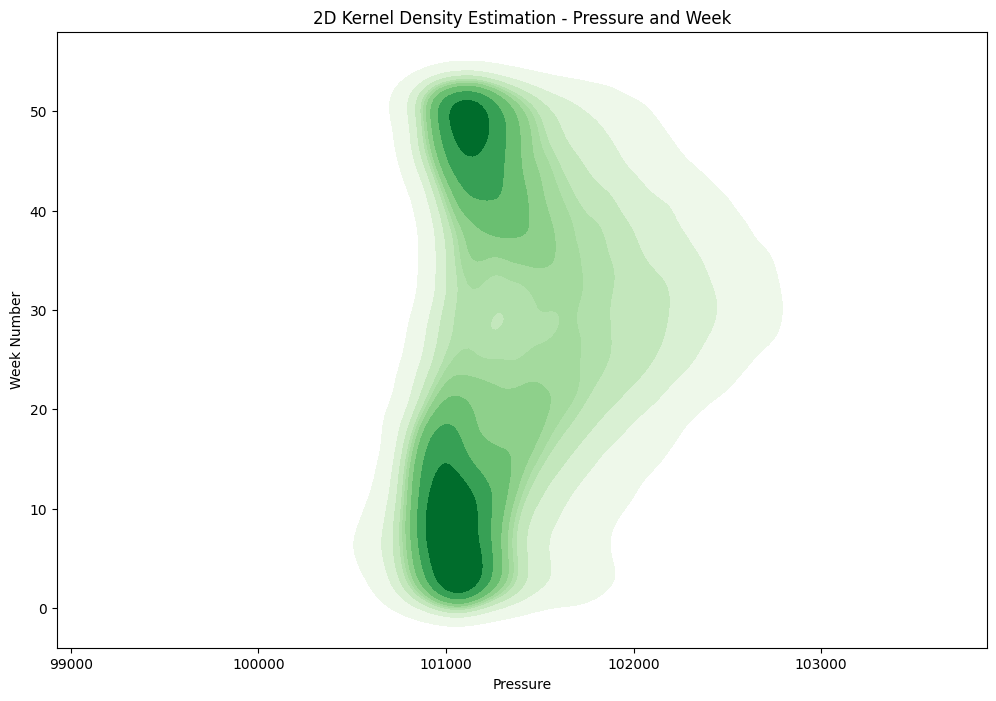

In [ ]:
# Create a 2D KDE plot
plt.figure(figsize=(12, 8))
sns.kdeplot(x='Pressure', y='Week', data=df_kde, cmap="Greens", fill=True)

plt.title('2D Kernel Density Estimation - Pressure and Week')
plt.xlabel('Pressure')
plt.ylabel('Week Number')

plt.show()

## Sea Surface Temperature

In [ ]:
df_temp = pd.read_csv('./csv/36_zones/temperature_1000hPa_10D.csv')
atts = ['DATE'] + mean_n_zones(36)
df_temp = df_temp[atts]
df_temp = df_temp.set_index('DATE')
df_temp

,Mean_Z1-0,Mean_Z2-0,Mean_Z3-0,Mean_Z4-0,Mean_Z5-0,Mean_Z6-0,Mean_Z7-0,Mean_Z8-0,Mean_Z9-0,Mean_Z10-0,...,Mean_Z27-0,Mean_Z28-0,Mean_Z29-0,Mean_Z30-0,Mean_Z31-0,Mean_Z32-0,Mean_Z33-0,Mean_Z34-0,Mean_Z35-0,Mean_Z36-0
DATE,,,,,,,,,,,,,,,,,,,,,
1980-01-12,301.513806,298.228728,298.487541,298.654115,298.644793,298.812240,299.668398,299.683429,298.882882,298.865468,...,298.456239,297.570001,296.709754,295.482329,295.773716,296.183795,297.735195,296.186713,294.024899,292.574489
1980-01-13,301.304368,298.540659,298.760503,298.467268,298.491737,298.678009,299.529083,299.450146,298.998494,298.424927,...,298.546271,297.685906,296.296732,294.965243,296.686074,295.869412,297.697466,296.377734,293.839782,291.944523
1980-01-14,301.052237,298.301295,298.700789,298.250554,298.368423,298.906908,300.248026,299.420969,299.137172,298.051127,...,298.075145,297.683570,295.968494,294.852962,296.154676,294.923253,296.914161,296.269508,293.708126,292.290454
1980-01-15,301.231747,298.117178,298.782878,298.556964,298.685387,298.498169,299.660734,299.420027,298.860036,297.785497,...,298.337954,297.764682,296.102089,295.260644,295.776325,294.792404,296.224733,296.291435,294.009508,292.594509
1980-01-16,300.905119,298.314793,298.453383,298.794147,298.380390,298.673581,299.398327,299.142458,298.711403,298.336710,...,297.993120,298.019804,296.956412,296.243029,296.499512,294.565893,294.815459,296.623892,295.184446,293.669430
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-03-23,300.200863,299.654709,300.308422,299.831280,300.712414,300.215572,299.049266,299.626787,300.370468,299.699936,...,298.456425,298.142023,297.667822,296.362500,295.728132,295.982524,295.926651,296.007593,295.088666,293.948309
2022-03-24,301.458738,300.180462,300.328919,299.696171,300.420222,300.264895,300.305450,300.143248,299.908208,299.379142,...,298.285407,298.095886,297.307692,296.307967,296.957007,296.860980,295.729541,295.979597,294.865853,293.991731
2022-03-25,301.735481,300.174554,300.537860,299.919791,300.567972,300.131298,301.058472,300.649871,300.369454,300.215681,...,298.376050,297.871703,297.017252,296.484637,297.970890,297.556727,296.728524,296.184043,294.632421,293.626139


In [ ]:
dates = df_temp.index

def get_week_number(date_str):
    # Convert the date string to a datetime object
    date_object = datetime.strptime(date_str, '%Y-%m-%d')
    # Use strftime to get the ISO week number
    week_number = date_object.strftime('%V')
    return int(week_number)

week_number_list = []
for elem in dates:
  week_number_list.append(get_week_number(elem))

week_number_arr = np.array(week_number_list)
print(week_number_arr.shape)
print(week_number_arr)

(15416,)
[ 2  2  3 ... 12 12 12]


In [ ]:
df_temp['WEEK'] = week_number_arr
df_temp

,Mean_Z1-0,Mean_Z2-0,Mean_Z3-0,Mean_Z4-0,Mean_Z5-0,Mean_Z6-0,Mean_Z7-0,Mean_Z8-0,Mean_Z9-0,Mean_Z10-0,...,Mean_Z28-0,Mean_Z29-0,Mean_Z30-0,Mean_Z31-0,Mean_Z32-0,Mean_Z33-0,Mean_Z34-0,Mean_Z35-0,Mean_Z36-0,WEEK
DATE,,,,,,,,,,,,,,,,,,,,,
1980-01-12,301.513806,298.228728,298.487541,298.654115,298.644793,298.812240,299.668398,299.683429,298.882882,298.865468,...,297.570001,296.709754,295.482329,295.773716,296.183795,297.735195,296.186713,294.024899,292.574489,2
1980-01-13,301.304368,298.540659,298.760503,298.467268,298.491737,298.678009,299.529083,299.450146,298.998494,298.424927,...,297.685906,296.296732,294.965243,296.686074,295.869412,297.697466,296.377734,293.839782,291.944523,2
1980-01-14,301.052237,298.301295,298.700789,298.250554,298.368423,298.906908,300.248026,299.420969,299.137172,298.051127,...,297.683570,295.968494,294.852962,296.154676,294.923253,296.914161,296.269508,293.708126,292.290454,3
1980-01-15,301.231747,298.117178,298.782878,298.556964,298.685387,298.498169,299.660734,299.420027,298.860036,297.785497,...,297.764682,296.102089,295.260644,295.776325,294.792404,296.224733,296.291435,294.009508,292.594509,3
1980-01-16,300.905119,298.314793,298.453383,298.794147,298.380390,298.673581,299.398327,299.142458,298.711403,298.336710,...,298.019804,296.956412,296.243029,296.499512,294.565893,294.815459,296.623892,295.184446,293.669430,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-03-23,300.200863,299.654709,300.308422,299.831280,300.712414,300.215572,299.049266,299.626787,300.370468,299.699936,...,298.142023,297.667822,296.362500,295.728132,295.982524,295.926651,296.007593,295.088666,293.948309,12
2022-03-24,301.458738,300.180462,300.328919,299.696171,300.420222,300.264895,300.305450,300.143248,299.908208,299.379142,...,298.095886,297.307692,296.307967,296.957007,296.860980,295.729541,295.979597,294.865853,293.991731,12
2022-03-25,301.735481,300.174554,300.537860,299.919791,300.567972,300.131298,301.058472,300.649871,300.369454,300.215681,...,297.871703,297.017252,296.484637,297.970890,297.556727,296.728524,296.184043,294.632421,293.626139,12


In [ ]:
press_zones_arr = []
zones_flag = []

for i in range(36):
  press_zones_arr.append(df_temp['Mean_Z{}-0'.format(i+1)].values)

for i in range(36):
  zones_flag.append(df_temp['WEEK'].values)

temp_arr = np.concatenate(press_zones_arr)
flag_arr = np.concatenate(zones_flag)
# Create a DataFrame using the arrays
data = {'Temperature': temp_arr, 'Week': flag_arr}
df_kde = pd.DataFrame(data)

df_kde

,Temperature,Week
0,301.513806,2
1,301.304368,2
2,301.052237,3
3,301.231747,3
4,300.905119,3
...,...,...
554971,293.948309,12
554972,293.991731,12
554973,293.626139,12
554974,293.925998,12


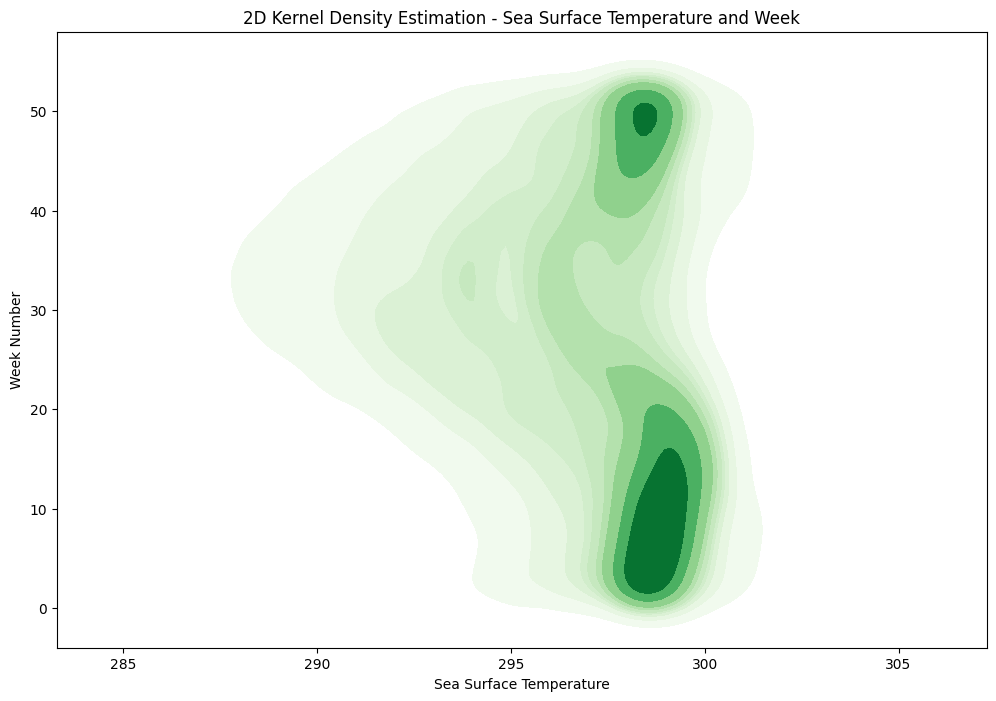

In [ ]:
# Create a 2D KDE plot
plt.figure(figsize=(12, 8))
sns.kdeplot(x='Temperature', y='Week', data=df_kde, cmap="Greens", fill=True)

plt.title('2D Kernel Density Estimation - Sea Surface Temperature and Week')
plt.xlabel('Sea Surface Temperature')
plt.ylabel('Week Number')

plt.show()